# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

- **RM**: The average number of rooms should be **positively correlated** with house prices. That is, adding an extra room to a house should increase its value/price. This is mainly because more rooms in a house means more living area, which tends to be valuable, as the extra space may have a variety of uses (e.g. extra guest room, additional room for children).


- **LSTART**: The percentage of homeowners considered "lower class" should have a **negative correlation** with housing prices. Higher LSTAT should lead to lower house prices, all else equal. This can be for a couple of reasons. First, if LSTAT is higher - and "lower class" translates into lower income -, the neighborhood will tend to attract commercial establishments that cater to lower income families, which do not raise the overall value of homes. Higher-end establishment (e.g. high-end restaurants and shops) will not come to the neighborhood, and these tend to have a positive impact on property values. Second, lower income will be associated with smaller residences, which similar to low RM homes tend to command lower value/prices.


- **PTRATIO**: The ratio of students to teachers should be **negatively correlated** with housing prices. Higher ratios should lead to lower house value/prices. This is because the PTRATIO should be an indicator of the availability and quality of schools in a neighborhood. Higher ratios mean that schools in the area are more crowded (i.e. more students per teachers); more crowded schools tend to have lower education quality. Neighborhoods with better schools are attractive, and tend to attract more homebuyers. The higher demand leads to higher house prices.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

The R-squared coefficient is also known as the goodness-of-the-fit for linear regression models. It is an evaluation of how well a certain (linear) model fits the data. R-squared value is the proportion of the dependent variable variation that can be explained by a linear model.

- Total Sum of Squares (SST)= 
    Sum of Squares Explained by Regression Model(SSR) + Sum of Squared Errors(SSE) (unexplained)

- $R^2$ = (SSR/SST) = 1-(SSE/SST)

The regression model can be univariate (one independent variable) or multivariate (multiple independent variables). Generally speaking, the R-squared value is between 0 and 1. Low values (i.e. close to zero) means that the percentage of total variation of the dependent variable explained by variations in the independent variable(s) is low. This signifies that the model does not explain the data well. Conversely, large R-squared values - i.e. close to 1 - indicate that variations in the independent variable(s) explain a large proportion of the variations in the dependent variable. However, caution must be exercised. Large R-squared values do not necessarily mean that the model is good. Specially when dealing with multivariate models, interactions between independent variables, omitted variable bias, and endogenous variables can lead to artificially high R-squared values. In those cases, additional techniques need to be applied to either adjust the R-squared coefficient, or to reduce the biases in the model.

In the case above, the R-squared valus is high, or close to one: the value is 0.923, or 92.3%. This coefficient implies that over 90% of the variation in the dependent variable can be explained by variations in independent variables as described by the model. Generally speaking, this model captures well the variations in the target/dependent variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=206)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Separating the data into training and testing is vital for evaluating models. A model that performs really well on the training set is not necessarily the best model, because it may not have generalized the information in the training set. It may have "memorized" it, which is overcomplicating the model. Once applied to new data, this model performs poorly. This is an example of overfitting. Conversely, a model may be oversimplified, leading to large errors in both training and testing sets. This is an example of underfitting.

We require the separation between training and testing data in order to check how the model does in terms of fit to the data. The sample sizes are also important because if the training set is too small, for example, there may not be enough information for the model to become a generalized version of the problem, leading to bad predictions. Conversely, if the training set is too large, there may not be enough data left to get a good idea of the models performance on unseen data.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

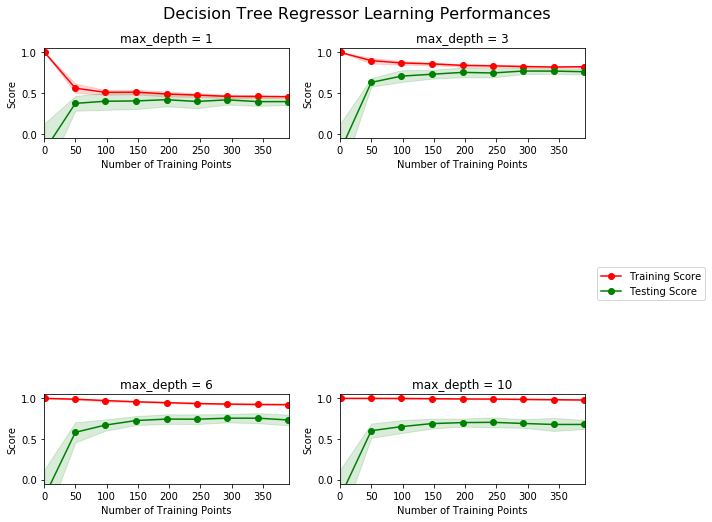

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

Maximum depth: 3

Both the training and the testing curves converge to a score of about 0.8, as more training points are added. Although more data is generally better, the curves are already stable and converging to a reasonable score. Adding more training points would not be beneficial at this point. We want to add more data to the training set to allow the model to generalize the problem better, but this comes at the expense of the testing set being reduced (as we must not use the testing set for training). If the training error is stable and at low enough level, it means that we probably reached a minimum, and cannot generalize the problem further. With the test error also stable and converging to the training error, we are also getting good results from the model applied to unseen data. If we reduce the testing set, we may not have enough information to judge the model, as it will be tested in too few data points.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

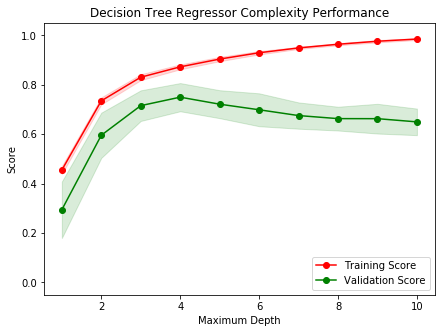

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

- At a maximum depth of 1, the model suffers from high bias, which is a sign of underfitting. The model is too simplistic (not complex enough) to explain the variations in the data.

- At a maximum depth of 10, the model suffers from high variance, which is a sign of overfitting. The model is overly complex. This is indicated by the fact that the training error is decreasing (score increasing) while the testing error is increasing (score decreasing). The model is not learning, or generalizing from the data, but rather memorizing the data, which makes it only capable of explaining the training set. When faced with new data (the testing set) the model is not able to make good predictions.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

The maximum depth of 4 seems to be ideal here. At this depth, the testing score peaks (error is minimized) which indicates that this is the best this model can do with unseen data. Beyond this depth, the testing score decreases, despite the fact that the training score is increasing. After a depth of 4, the model is becoming overly complex.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

The grid search technique is a procedure used to optimize hyperparameters of machine learning models. Generally, it is used when there are more than one hyperparameter, where a grid is formed by showing the variations of one hyperparameter in the rows, and the variations of the other in columns. The model is then trained for each combination of the hyperparameters, and the $F_{beta}$ score is computed using the cross-validation set. The combination of the parameters that yields the highest score is considered to be the best fit.

For example, one hyperparameter can be the max depth (max_depth) of a decision tree, while the other could be the minimum number of samples required to be at a leaf node (min_samples_leaf). These hyperparameters could have values from 1 to 5, so the grid becomes a 5 x 5 table - with each cell being the combinations of the different values of each hyperparameter. Training the model for each combination, and checking the $F_1$ score for the cross-validation set, would show us which combination of max_depth and min_samples_leaf would yield the best model - say, max_depth = 4 and min_samples_leaf = 2.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

K-fold cross-validation is an algorithm validation technique. It basically tells us if a machine learning model will train properly or not. To apply the technique, first we divide the data into two sets: one for training and cross-validation, and one for final testing. The training/CV set is then further divided into K buckets or folds. Out of these K buckets, one is chosen as the validation bucket while the other ones are used for training. This process of separating a bucket for validation and using the remaining for training is repeated, until all folds/buckets have been used as validation. At each pass, we generate evaluation metrics, which are then averaged across the entire process to get us an unbiased generalization of the model applied to unseen data.

- Simple numeric example: Let's say we have 100 observations/rows, and we keep 20 observations for final testing. This leaves us with 80 observations for training/CV. If K = 20, at each pass, we have 60 observations for training and 20 for CV.

The main advantage of this method is that we use all the information available for training, thus not losing any information, while not breaking the rule of never using the testing data for training. If we used a fixed split between training and testing, it is possible that the resulting model is only good for the particular arrangement of data given by the split. In other words, the results could be biased by the choices of training and testing sets. Using the K-fold technique, we reduce the chance of biasing the results.

In the context of grid search, the K-fold technique is applied by taking a combination of hyperparameters and running the entire K-fold process. This helps us get an unbiased evaluation metric for the model given the hyperparameters chosen. This is repeated for all hyperparameter combinations in the grid. By picking the combination with the highest unbiased score, we are ensuring that the model with those hyperparameters shows the best, unbiased generalization of the model when applied to unseen data.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=206)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth": list(range(1, 11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The optimal depth is **4**. This is the same as in question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $402,553.85
Predicted selling price for Client 2's home: $235,386.67
Predicted selling price for Client 3's home: $863,520.00


**Answer: **

- Client 1: recommended selling price around \$403,000.
- Client 2: recommended selling price around \$235,000.
- Client 3: recommended selling price around \$863,000.

The prices are reasonable given the features of each of the clients' houses. Client 2 has the smallest house in a neighborhood with the highest concentration of low income workers, and with the highest ratio of student-to-teachers. Consequently, this client's house show the lowest predicted price. Client 1's house has one extra room, and is in a neighborhood where the proportion of low income workers is roughly half of the proportion of client 2's neighborhood. In addition, client 1's neighborhood also show a better ratio of students-to-teacher. This contributes to client 1's house having a predicted price almost 1.8 times higher than client 2's house.

Lastly, client 3 has a much larger house, in a wealthier neighborhood, where the students-to-teacher ratio is the most favourable. All combined, these features contribute to a house price more than double that of client 1's, and triple that of client 2's.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

Although the model show interesting results that agree with general intuition, the model should not be used in a real-world application. Firstly, the data used in the model is outdated. From 1978 to 2019 (time of writing), many socio-economic features of the housing market in Boston have certainly changed. Apart from overall, compounded effects such as inflation and mortgage rates, consumer taste and environmental changes have occurred. For example, Boston has experienced high rates of economic development and a booming startup ecosystem. These contributed to a disproportional generation of high-paying jobs, relative to competing metropolitan areas, which would tend to also disproportionally increase house prices.

Secondly, the model captured many important features that contribute to house prices, but may have left out other important ones. For example, the number of rooms in a house is certainly a contributor to house prices, but if we do not control for overall house size (in sq. feet, for example) we may not be performing fair comparisons. In addition, other factors, such as presence of a yard, pool, basement, and/or garage, could be further contributors to price variations, not captured by the model. These additional features tend to be valuable to homeowners. Despite these absences, the model does correctly account for some external factors that do influence housing prices. Real estate is about location, which indicates that neighborhood factors play an important role in determining house value/price. Some external factors that could also contribute to house prices, but were left out of the model, include: overall neighborhood safety (measured by crime rates); traffic and air quality; and proximity to other utility services, such as hospitals.

Lastly, as its stands, the model would only be applicable to Boston. We could not use the same model to appraise residences in rural areas, for example. Moreover, using the model to predict prices in other metropolitan areas would also be imprudent, as the effects of the features considered by the model could be different in other urban areas.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.